# Лобраторная работа №1

In [0]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files

In [9]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samirn","key":"4b4c17ec4fa48432cced9da3ba797a39"}'}

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           4591  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           5810  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           3MB  2019-08-21 14:51:34           2058  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          2MB  2019-07-05 09:58:02           3425  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [17]:
files.upload()

Saving google-play-store-apps.zip to google-play-store-apps.zip


{'google-play-store-apps.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x15LEO~\xc4\x08\xd6\xff\xff\xff\xff\xff\xff\xff\xff\x13\x00\x14\x00googleplaystore.csv\x01\x00\x10\x00\x1b\xc1\x14\x00\x00\x00\x00\x00d\xdd\x04\x00\x00\x00\x00\x00\xec\xbd[o\xe4X\x9a \xf6>\xc0\xfc\x07\x8ev\x91S\x85\xa4\xa2yxg\xd6\x83\x11\n]+\x15\x92Z\xa1\xcc\xec\xae\x97\x01\x15AIl1\xc8h2"\x95Q\x98\x87\x86=\x86\x8d\x05\x0c\xac=\x83\x85\xe7i\xe01\x166|\x19c_l\xf8\xb2/3\x7fb\xfaq{a?\xcfO\xf0\xf7\x9d\xc3\xcb9\x87d\x04\x19RUf\xed\xd6\x0e\xb6+u\x8b\xf3\x9d\xef|\xf7\xebp\xb1PG\xfe2\xb8O\xd2\xb5z\xed/\xc3\xf8^\xbd\x0e>\x86\xc1S\xa6N\xc2\xef\x03\xf5,\xce\x96~\x14e\xea\xcdz\x11\xa8Wi8\r\xd4Q\x12/\x83x\xa9\xe4\xbf\x7f\x12\xc4i\x90\xa9\xe7~\xb6T\xde-f\xf0i3u\xb4JS\xfc\x95\xf7A\xaa\x0e\xe3Y\x9a\x843\xfc\xf7\x1f\xff\xd1\xd5C\xb2L\x94\xa3Y\xb8LR\xe5\x952\xf2\xe3\xd9\x1a\xfew\x1e\xa4>|y\x92\xc2\xef\xbdR&\xd3\xd4_\x1c$\xc9\xa3:\xbc\xbe\xf9\xb3\xe1\xc5\xe1\x9f\x1d\x1eM\xceN.Ts@Tby*\xf1\xc6\xea\x1e\xd1TM\xd3^\xef\xa9\xc7i\x10\xa8\x9az\xf41H

In [0]:
!mkdir /content/google_play_store_apps_data

In [20]:
!unzip /content/google-play-store-apps.zip

Archive:  /content/google-play-store-apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


# Очистка данных



Датасет состоит из следующих данных:
* App - Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
* Price: Price of the app (as when scraped)
* Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main * category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots

In [163]:
data  = pd.read_csv("googleplaystore.csv")
data

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
5                             Paper flowers instructions  ...          2.3 and up
6                Smoke Effect Photo Maker - Smoke Editor  ...        4.0.3 and up
7                                       Infinite Painter  ...          4.2 and up
8                                   Garden Coloring Book  ...          3.0 and up
9                          Kids Paint Free - Drawing Fun  ...        4.0.3 and up
10                               Text on Photo - Fonteee  ...          4.1 and up
11               Name Art Photo Editor - Focus n Filters  ...          4.0 and up
12                        Tattoo Name On My Photo Editor  ...          4.1 and up
13                                 Mandala Coloring Book  ...          4.4 and up
14       3D Color Pixel by Number - Sandbox Art Coloring  ...          2.3 and up
15                       Learn To Draw Kawaii Characters  ...          4.2 and up
16          Photo Designer - Write your name with shapes  ...          4.1 and up
17                              350 Diy Room Decor Ideas  ...          2.3 and up
18                         FlipaClip - Cartoon animation  ...        4.0.3 and up
19                                          ibis Paint X  ...          4.1 and up
20                           Logo Maker - Small Business  ...          4.1 and up
21             Boys Photo Editor - Six Pack & Men's Suit  ...        4.0.3 and up
22               Superheroes Wallpapers | 4K Backgrounds  ...        4.0.3 and up
23                                Mcqueen Coloring pages  ...          4.1 and up
24                           HD Mickey Minnie Wallpapers  ...          4.1 and up
25                            Harley Quinn wallpapers HD  ...          3.0 and up
26                         Colorfit - Drawing & Coloring  ...        4.0.3 and up
27                                 Animated Photo Editor  ...        4.0.3 and up
28                                 Pencil Sketch Drawing  ...          2.3 and up
29                       Easy Realistic Drawing Tutorial  ...          2.3 and up
...                                                  ...  ...                 ...
10811                                        FR Plus 1.6  ...         4.4W and up
10812                                      Fr Agnel Pune  ...        4.0.3 and up
10813                                     DICT.fr Mobile  ...          4.1 and up
10814                               FR: My Secret Pets!   ...          3.0 and up
10815                          Golden Dictionary (FR-AR)  ...          4.2 and up
10816                                 FieldBi FR Offline  ...          4.1 and up
10817                               HTC Sense Input - FR  ...          5.0 and up
10818                               Gold Quote - Gold.fr  ...          2.2 and up
10819                                          Fanfic-FR  ...          4.1 and up
10820                                    Fr. Daoud Lamei  ...          4.1 and up
10821                                            Poop FR  ...        4.0.3 and up
10822                                          PLMGSS FR  ...          4.4 and up
10823                                       List iptv FR  ...        4.0.3 and up
10824                                          Cardio-FR  ...          4.4 and up
10825                                 Naruto & Boruto FR  ...          4.0 and up
10826          Frim: get new friends on local chat rooms  ...  Varies with device
10827                                 Fr Agnel Ambarnath  ...        4.0.3 and up
10828                            Ma

In [0]:
data.columns = data.columns.str.replace(' ', '_')

In [165]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [166]:
print("Shape of data (samples, features): ",data.shape)
print("Data Types: \n", data.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


The data has 12 object and 1 numeric feature i.e. Rating.

Now Exploring each features individually

* Size
* Installs
* Reviews
* Rating
* Type
* Price
* Category
* Content Rating
* Genres
* Last Updated
* Current Version
* Android Version

# Size
посмотрим на частоту каждого элемента, чтобы получить некоторое представление о природе данных

In [167]:
data.Size.value_counts().head()
# ~ please remove head() to get a better understanding 

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

Видно, что данные имеют метрические префиксы (кило и мега) вместе с другой строкой. Заменим k и M c их численными значениями, чтобы преобразовать значения в числовые.

In [168]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Теперь в наборе есть два типа значений для `Size`.

1. экспоненциальные значения (то есть еще не преобразованы в строку)
2. Строки (которые не могут быть преобразованы в числовые)

Таким образом, указав категории 1 и 2 как логический массив temp, преобразуйте категорию 1 в числовой.

In [169]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Проверяем уникальные (нечисловые значения) (~ temp) в Size.

In [170]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

* Заменяем 'Varies with Device' на Nan и
* Преобразовываем 1000+ в 1000, чтобы сделать его числовым

In [0]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

Преобразование очищенных данных 'Size' в числовой тип

In [0]:
data.Size=pd.to_numeric(data.Size)

Text(0, 0.5, 'Frequency')

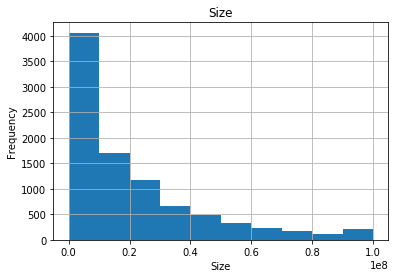

In [173]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

# Installs

Также проверяем на уникальные значения в 'Install'

In [174]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

Видно, что существует 22 уникальных значения, из которых:

* 1 равно 0,
* 1 - это Free (строка), которую мы здесь будем конвертировать в nan
* и остальные являются числовыми, но с '+' и ',', которые должны быть удалены, чтобы преобразовать их в числовой тип.

In [175]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

Проверяем, преобразованы ли данные в числовые

In [176]:
data.Installs.str.isnumeric().sum()

10840

Теперь в 'Installs', 1 образец не числовой из 10841, который является nan (преобразованный из Free в nan на предыдущем шаге)

In [0]:
data.Installs=pd.to_numeric(data.Installs)

Text(0, 0.5, 'Frequency')

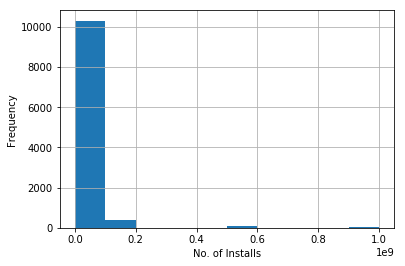

In [178]:
data.Installs=pd.to_numeric(data.Installs)
data.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

# Reviews
Проверям, все ли значения в числах отзывов (Reviews) являются числовые

In [179]:
data.Reviews.str.isnumeric().sum()

10840

Одно значение не числовое из 10841. Найдем его значение и идентификатор

In [180]:
data[~data.Reviews.str.isnumeric()]

App Category  ...  Current_Ver Android_Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

We could have converted it into interger like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong (i.e. cell backwared). We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

Можно преобразовать его в Interger, как как было сделано в Size, но данные для этого приложения выглядят иначе. Можно заметить, что записи введены неправильно (то есть с обратной стороны ячейки). Можно исправить это, установив Category как nan и сместив все значения, но удалив образец на данный момент.

In [0]:
data=data.drop(data.index[10472])

проверяем, удалена ли строка

In [182]:
data[10471:].head(2)

App         Category  ...  Current_Ver   Android_Ver
10471         Xposed Wi-Fi-Pwd  PERSONALIZATION  ...        3.0.0  4.0.3 and up
10473  osmino Wi-Fi: free WiFi            TOOLS  ...      6.06.14    4.4 and up

[2 rows x 13 columns]

In [0]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

Text(0, 0.5, 'Frequency')

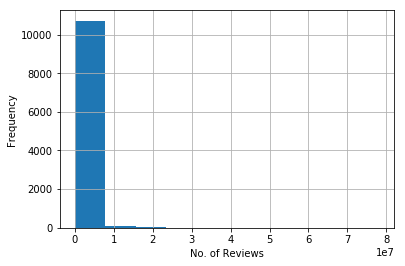

In [184]:
data.Reviews=pd.to_numeric(data.Reviews)
data.Reviews.hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

# Rating
Чтобы записи были правильными, нам нужно убедиться, что они попадают в диапазон от 1 до 5

In [185]:
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  1.0 - 5.0


Проверяем тип данных, чтобы увидеть, нужно ли их преобразовывать в числовые

In [186]:
data.Rating.dtype

dtype('float64')

Data is already numeric, now checking if the data has null values

In [187]:
print(data.Rating.isna().sum(),"null values out of", len(data.Rating))

1474 null values out of 10840


Text(0, 0.5, 'Frequency')

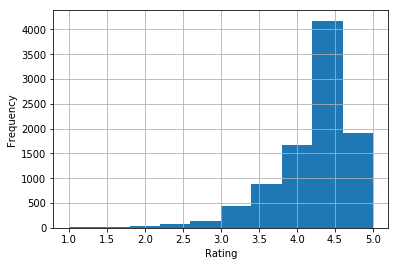

In [188]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Type
Также проверяем

In [190]:
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

# Price
Проверка на уникальные значения цены, отклонения

Есть только два типа, бесплатные и платные. Здесь нет нежелательных данных.

In [191]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

В наборе имеются данные со знаком $, который должен быть удален, чтобы корректно преобразовать их в числовые

In [0]:
data.Price=data.Price.apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Frequency')

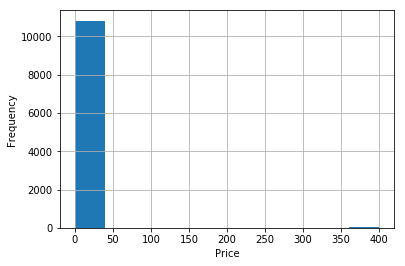

In [193]:
data.Price=pd.to_numeric(data.Price)
data.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')

In [194]:
temp=data.Price.apply(lambda x: True if x>350 else False)
data[temp].head(3)

App   Category  ...  Current_Ver  Android_Ver
4197    most expensive app (H)     FAMILY  ...          1.0   7.0 and up
4362                💎 I'm rich  LIFESTYLE  ...        1.0.0   4.4 and up
4367  I'm Rich - Trump Edition  LIFESTYLE  ...        1.0.1   4.1 and up

[3 rows x 13 columns]

# Category


In [195]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Нет повторений или 'ложных' данных

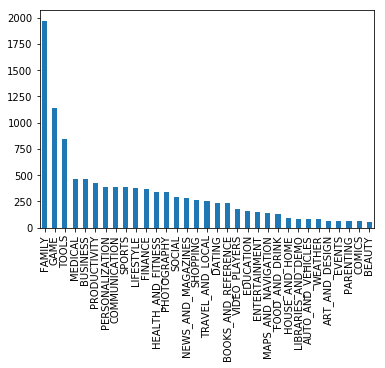

In [196]:
data.Category.value_counts().plot(kind='bar')

# Content Rating

In [197]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

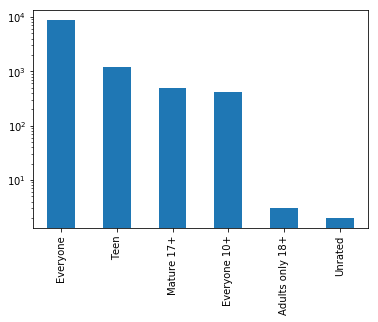

In [198]:
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

# Genres
Проверка уникальных значений, отклонений или повторений в данных

In [199]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The data is in the format __Category;Subcategory__. Lets divide the data into two columns, one as primary category and the other as secondary, using ; as separator.

Данные в формате __ Категория; Подкатегория. Имеет смысл разделить данные на два столбца, один как первичная категория, а другой как вторичная. используем ";" в качестве разделителя.

In [200]:
sep = ';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [201]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [202]:
grouped = data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

Создаем две таблиц для лучшего понимания взаимосвязи между первичной и вторичной категориями жанров

In [203]:
twowaytable = pd.crosstab(index=data["Pri_Genres"],columns=data["Sec_Genres"])
twowaytable.head()

Sec_Genres       Action  Action & Adventure  ...  Weather  Word
Pri_Genres                                   ...               
Action              365                  17  ...        0     0
Adventure             0                  13  ...        0     0
Arcade                0                  16  ...        0     0
Art & Design          0                   2  ...        0     0
Auto & Vehicles       0                   0  ...        0     0

[5 rows x 52 columns]

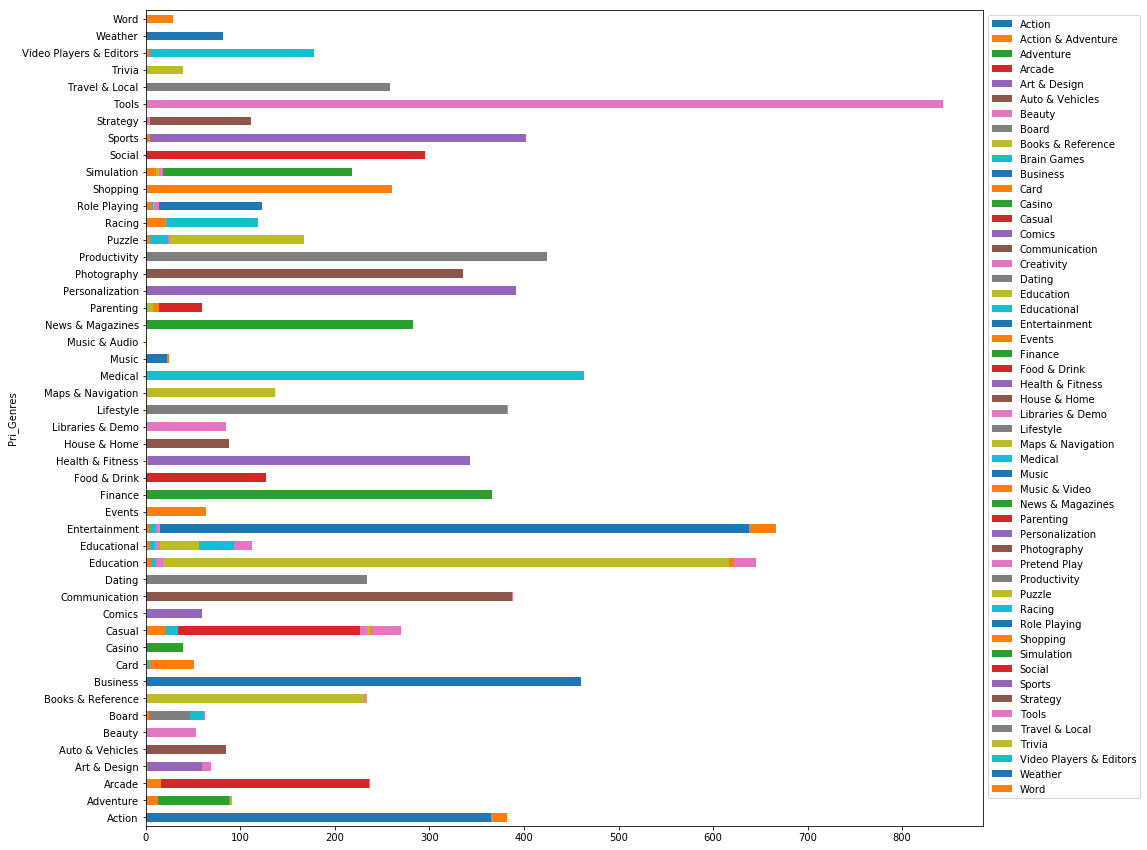

In [204]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

# Last Updated


In [205]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Преобразовываем данные из формат строки в дату / время для дальнейшей обработки

In [206]:
from datetime import datetime,date
temp=pd.to_datetime(data.Last_Updated)
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

Можно получить количество дней, если взять разницу между последней обновленной датой и сегодняшним днем, чтобы упростить данные для дальнейшей обработки.

In [207]:
data['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
data.Last_Updated_Days.head()

0   651 days
1   643 days
2   445 days
3   499 days
4   487 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

# Android Version


In [208]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Большинство значений имеют верхнее и нижнее значения (дииапазон), что позволяет разделить их на две новые функции __Version begin и end__, которые могут пригодиться при дальнейшей обработке данных

In [0]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [210]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

Представление категориальных данных в виде двухсторонней таблицы и представление их в виде столбцов с накоплением для лучшего понимания

In [211]:
twowaytable = pd.crosstab(index=data.Version_begin,columns=data.Version_end)
twowaytable.head()

Version_end    6.0  7.1.1  8.0  Varies with device  nan   up
Version_begin                                               
1.0              0      0    0                   0    0    2
1.5              0      0    0                   0    0   20
1.6              0      0    0                   0    0  116
2.0              0      0    0                   0    0   32
2.0.1            0      0    0                   0    0    7

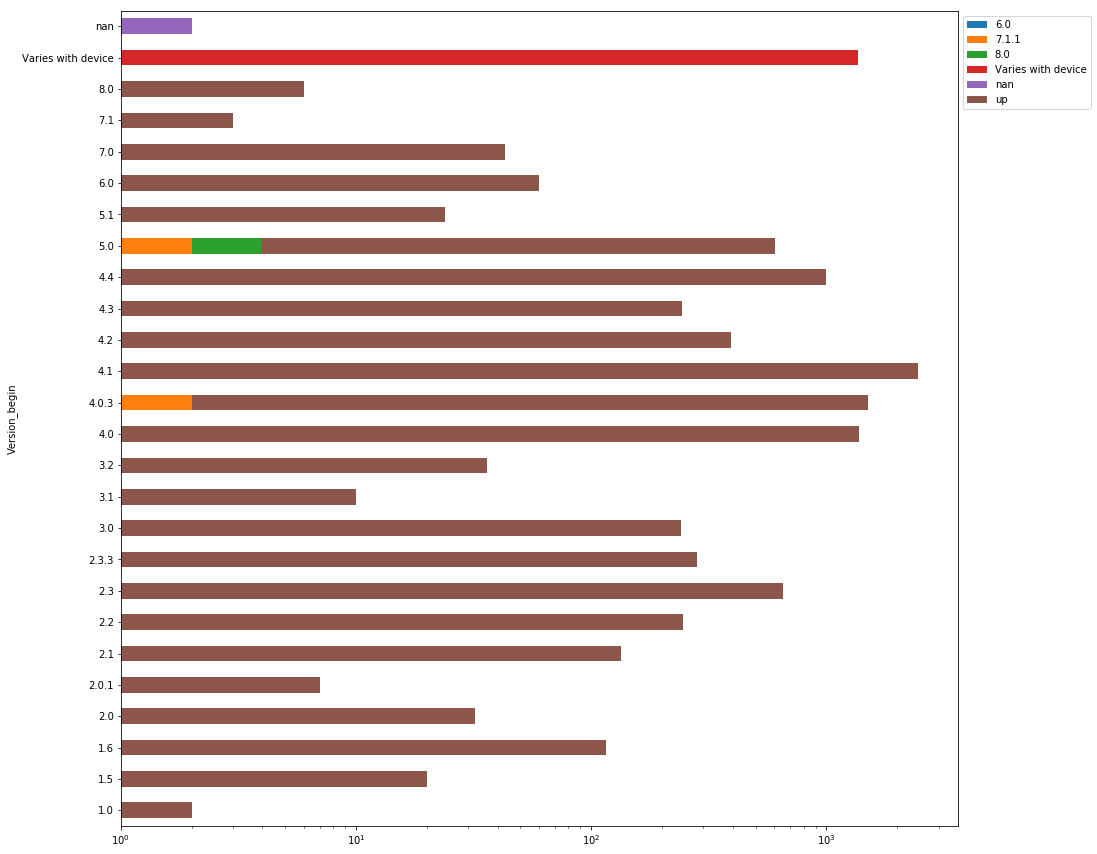

In [212]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [213]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)

# Current Version

In [214]:
data.Current_Ver.value_counts().head(6)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
Name: Current_Ver, dtype: int64

Прееобразуем все версии в формате __format number.number__, чтобы упростить данные, а также проверить, имеют ли данные нулевые значения. Кроме того, не преобразовываем value_counts в nan из-за его высокой частоты.

In [215]:
data.Current_Ver.isna().sum()

8

In [0]:
import re
temp=data.Current_Ver.replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [217]:
temp.unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

Сохраняем обновленные значения текущей версии в виде нового столбца

In [0]:
data['Current_Ver_updated']=temp

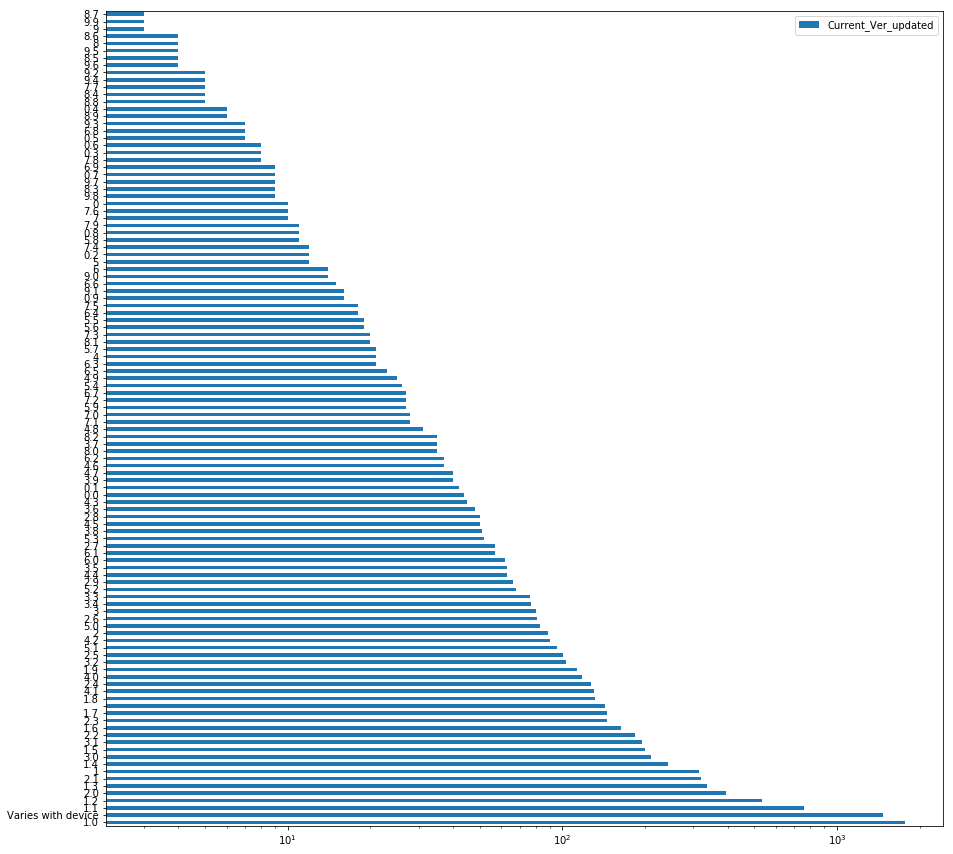

In [219]:
data.Current_Ver_updated.value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78efffb860>,
      dtype=object)

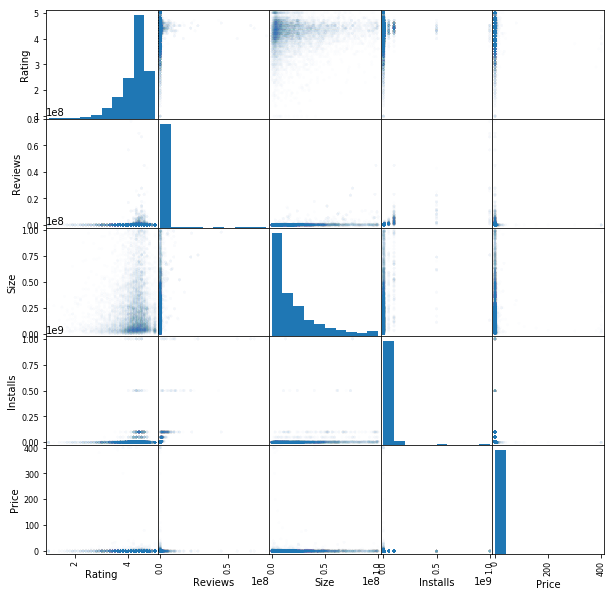

In [220]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


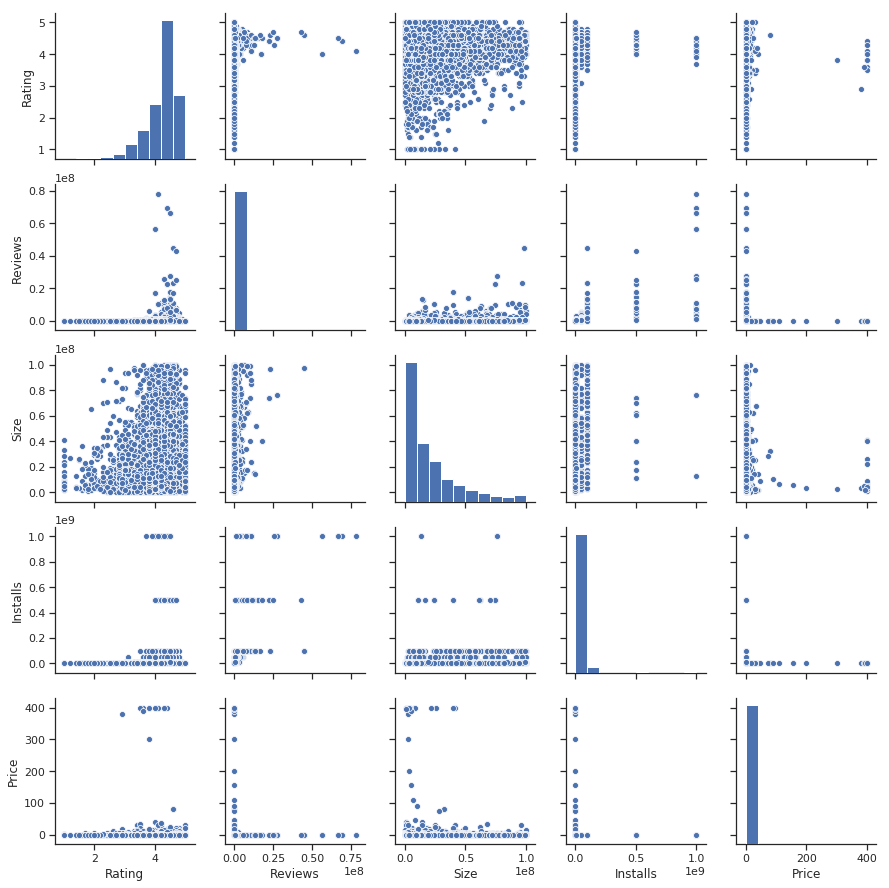

In [225]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data)
pass

In [221]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Last_Updated_Days',
       'Version_begin', 'Version_end', 'Current_Ver_updated'],
      dtype='object')

In [231]:
data.corr()

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.068141  0.083734  0.051355 -0.021903
Reviews   0.068141  1.000000  0.238215  0.643122 -0.009667
Size      0.083734  0.238215  1.000000  0.164787 -0.023006
Installs  0.051355  0.643122  0.164787  1.000000 -0.011689
Price    -0.021903 -0.009667 -0.023006 -0.011689  1.000000

### просмотр данных

In [226]:
data.describe(include = ['object'])

App Category   Type  ... Version_begin Version_end Current_Ver_updated
count    10840    10840  10839  ...         10840       10840               10840
unique    9659       33      2  ...            26           6                 112
top     ROBLOX   FAMILY   Free  ...           4.1          up                 1.0
freq         9     1972  10039  ...          2452        9467                1767

[4 rows x 13 columns]

In [227]:
data.describe(include = 'all')

App Category  ...  Version_end  Current_Ver_updated
count    10840    10840  ...        10840                10840
unique    9659       33  ...            6                  112
top     ROBLOX   FAMILY  ...           up                  1.0
freq         9     1972  ...         9467                 1767
mean       NaN      NaN  ...          NaN                  NaN
std        NaN      NaN  ...          NaN                  NaN
min        NaN      NaN  ...          NaN                  NaN
25%        NaN      NaN  ...          NaN                  NaN
50%        NaN      NaN  ...          NaN                  NaN
75%        NaN      NaN  ...          NaN                  NaN
max        NaN      NaN  ...          NaN                  NaN

[11 rows x 19 columns]

In [232]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['App', 'Category', 'Type', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Version_begin', 'Version_end', 'Current_Ver_updated']
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated_Days']


In [233]:
for c in categorical_columns:
    print(c, data[c].unique())

App ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Type ['Free' 'Paid' nan]
Content_Rating ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Genres ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Busine

# Обрабатываем пропущенные значения
Если данные содержат пропущенные значения, то имеется две простые альтернативы:

* удалить столбцы с такими значениями (data = data.dropna(axis = 1)),
* удалить строки с такими значениями (data = data.dropna(axis = 0)).
После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [234]:
data.median(axis = 0)

Rating             4.3
Reviews         2094.0
Size        13000000.0
Installs      100000.0
Price              0.0
dtype: float64

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [236]:
data[numerical_columns].count(axis = 0)

Rating               10840
Reviews              10840
Size                 10840
Installs             10840
Price                10840
Last_Updated_Days    10840
dtype: int64

In [237]:
data[categorical_columns].count(axis = 0)

App                    10840
Category               10840
Type                   10839
Content_Rating         10840
Genres                 10840
Last_Updated           10840
Current_Ver            10832
Android_Ver            10838
Pri_Genres             10840
Sec_Genres             10840
Version_begin          10840
Version_end            10840
Current_Ver_updated    10840
dtype: int64

In [238]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Last_Updated_Days',
       'Version_begin', 'Version_end', 'Current_Ver_updated'],
      dtype='object')

In [239]:
data.describe(include = [object])

App Category   Type  ... Version_begin Version_end Current_Ver_updated
count    10840    10840  10839  ...         10840       10840               10840
unique    9659       33      2  ...            26           6                 112
top     ROBLOX   FAMILY   Free  ...           4.1          up                 1.0
freq         9     1972  10039  ...          2452        9467                1767

[4 rows x 13 columns]

In [0]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [241]:
data.describe(include = [object])

App Category   Type  ... Version_begin Version_end Current_Ver_updated
count    10840    10840  10840  ...         10840       10840               10840
unique    9659       33      2  ...            26           6                 112
top     ROBLOX   FAMILY   Free  ...           4.1          up                 1.0
freq         9     1972  10040  ...          2452        9467                1767

[4 rows x 13 columns]

# Векторизация
Нужно что-то сделать с категориальными (номинальными) признаками

In [272]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Type'] ['App', 'Category', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Version_begin', 'Version_end', 'Current_Ver_updated']


In [243]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [244]:
data.at[data['Type'] == 'Free', 'Type'] = 0
data.at[data['Type'] == 'Paid', 'Type'] = 1
data['Type'].describe()

count    10840.000000
mean         0.073801
std          0.261458
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Type, dtype: float64

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак race принимает 5 различных значений:

In [246]:
def show_cat_uniqs(nonbinary_columns):
  for column_nam in nonbinary_columns:
    print(column_nam)
    print(data[column_nam].unique())
show_cat_uniqs(nonbinary_columns)

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Content_Rating
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Genres
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Crea

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [251]:
data[nonbinary_columns].describe()

App Category  ... Version_end Current_Ver_updated
count    10840    10840  ...       10840               10840
unique    9659       33  ...           6                 112
top     ROBLOX   FAMILY  ...          up                 1.0
freq         9     1972  ...        9467                1767

[4 rows x 12 columns]

In [256]:
data['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [248]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['App_"i DT" Fútbol. Todos Somos Técnicos.',
       'App_+Download 4 Instagram Twitter', 'App_- Free Comics - Comic Apps',
       'App_.R', 'App_/u/app', 'App_058.ba', 'App_1. FC Köln App',
       'App_10 Best Foods for You', 'App_10 Minutes a Day Times Tables',
       'App_10 WPM Amateur ham radio CW Morse code trainer',
       ...
       'Current_Ver_updated_9.1', 'Current_Ver_updated_9.2',
       'Current_Ver_updated_9.3', 'Current_Ver_updated_9.4',
       'Current_Ver_updated_9.5', 'Current_Ver_updated_9.6',
       'Current_Ver_updated_9.7', 'Current_Ver_updated_9.8',
       'Current_Ver_updated_9.9', 'Current_Ver_updated_Varies with device'],
      dtype='object', length=14302)


In [249]:
len(data_nonbinary.columns)

14302

Есть параметры которые не представляют для анализа в данной задачи большое значение, но при этом имееют огормное количество больших уникальных значений.
При векторизации соответсвенно количесвто вырастает до непозволительно высокого значения.
Genres, т.к. из неё получали колонки Pri_Genres',
 'Sec_Genres'
 
  'Version_begin','Version_end', получаются из Andoird_Ver
Попробуем простым удалением данных колонок решить проблему размерности. Удаляемые колонки: 

Last_Updated, Genres, Current_Ver, Android_Ver, Version_begin, Version_end, Current_Ver_updated, App
(App значения выбираются только по одному уникальному значению)

In [0]:
deleted_columns = ['App', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Version_begin', 'Version_end', 'Current_Ver_updated']
data = data.drop(deleted_columns, axis=1)


In [275]:
new_nonbinary_columns = [columns for columns in nonbinary_columns if columns not in deleted_columns]
new_nonbinary_columns

['Category', 'Content_Rating', 'Pri_Genres', 'Sec_Genres']

In [269]:
new_data.describe()

Rating       Reviews  ...         Price         Last_Updated_Days
count  10840.000000  1.084000e+04  ...  10840.000000                     10840
mean       4.206476  4.441529e+05  ...      1.027368  697 days 17:16:57.564575
std        0.480342  2.927761e+06  ...     15.949703  394 days 14:39:49.498440
min        1.000000  0.000000e+00  ...      0.000000         438 days 00:00:00
25%        4.100000  3.800000e+01  ...      0.000000         457 days 00:00:00
50%        4.300000  2.094000e+03  ...      0.000000         514 days 00:00:00
75%        4.500000  5.477550e+04  ...      0.000000         760 days 00:00:00
max        5.000000  7.815831e+07  ...    400.000000        3439 days 00:00:00

[8 rows x 7 columns]

In [277]:
data[new_nonbinary_columns].describe()

Category Content_Rating Pri_Genres Sec_Genres
count     10840          10840      10840      10840
unique       33              6         48         52
top      FAMILY       Everyone      Tools      Tools
freq       1972           8714        843        842

Теперь можно выполнить вектаризацию

In [278]:
data_nonbinary = pd.get_dummies(data[new_nonbinary_columns])
print(data_nonbinary.columns)

Index(['Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT',
       ...
       'Sec_Genres_Simulation', 'Sec_Genres_Social', 'Sec_Genres_Sports',
       'Sec_Genres_Strategy', 'Sec_Genres_Tools', 'Sec_Genres_Travel & Local',
       'Sec_Genres_Trivia', 'Sec_Genres_Video Players & Editors',
       'Sec_Genres_Weather', 'Sec_Genres_Word'],
      dtype='object', length=139)


In [279]:
len(data_nonbinary.columns)

139

# Нормализация количественных признаков
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [280]:
data_numerical = data[numerical_columns]
data_numerical.describe()

Rating       Reviews  ...         Price         Last_Updated_Days
count  10840.000000  1.084000e+04  ...  10840.000000                     10840
mean       4.206476  4.441529e+05  ...      1.027368  697 days 17:16:57.564575
std        0.480342  2.927761e+06  ...     15.949703  394 days 14:39:49.498440
min        1.000000  0.000000e+00  ...      0.000000         438 days 00:00:00
25%        4.100000  3.800000e+01  ...      0.000000         457 days 00:00:00
50%        4.300000  2.094000e+03  ...      0.000000         514 days 00:00:00
75%        4.500000  5.477550e+04  ...      0.000000         760 days 00:00:00
max        5.000000  7.815831e+07  ...    400.000000        3439 days 00:00:00

[8 rows x 6 columns]

In [311]:
data_numerical['Last_Updated_Days'].dtype

dtype('<m8[ns]')

In [312]:
data_numerical['Last_Updated_Days'] = pd.to_numeric(data_numerical['Last_Updated_Days'].dt.days, downcast='integer')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
data_numerical['Last_Updated_Days'].dtype

dtype('int16')

In [314]:
data_numerical.describe()

Rating       Reviews  ...         Price  Last_Updated_Days
count  10840.000000  1.084000e+04  ...  10840.000000       10840.000000
mean       4.206476  4.441529e+05  ...      1.027368         697.720111
std        0.480342  2.927761e+06  ...     15.949703         394.610990
min        1.000000  0.000000e+00  ...      0.000000         438.000000
25%        4.100000  3.800000e+01  ...      0.000000         457.000000
50%        4.300000  2.094000e+03  ...      0.000000         514.000000
75%        4.500000  5.477550e+04  ...      0.000000         760.000000
max        5.000000  7.815831e+07  ...    400.000000        3439.000000

[8 rows x 6 columns]

In [0]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [316]:
data_numerical.describe()

Rating       Reviews  ...         Price  Last_Updated_Days
count  1.084000e+04  1.084000e+04  ...  1.084000e+04       1.084000e+04
mean  -2.917587e-13 -6.307995e-16  ...  2.138511e-16      -9.988935e-16
std    1.000000e+00  1.000000e+00  ...  1.000000e+00       1.000000e+00
min   -6.675402e+00 -1.517040e-01  ... -6.441299e-02      -6.581675e-01
25%   -2.216671e-01 -1.516910e-01  ... -6.441299e-02      -6.100188e-01
50%    1.947029e-01 -1.509887e-01  ... -6.441299e-02      -4.655727e-01
75%    6.110729e-01 -1.329950e-01  ... -6.441299e-02       1.578260e-01
max    1.651998e+00  2.654389e+01  ...  2.501442e+01       6.946791e+00

[8 rows x 6 columns]


# Соединяем все в одну таблицу

In [317]:
data_numerical.head()

Rating   Reviews      Size  Installs     Price  Last_Updated_Days
0 -0.221667 -0.151650 -0.056483 -0.181753 -0.064413          -0.118395
1 -0.638037 -0.151374 -0.294841 -0.175990 -0.064413          -0.138668
2  1.027443 -0.121814 -0.547501 -0.123067 -0.064413          -0.640428
3  0.611073 -0.078049  0.229547  0.406162 -0.064413          -0.503585
4  0.194703 -0.151374 -0.828764 -0.180695 -0.064413          -0.533995

In [318]:
data_nonbinary.head()

Category_ART_AND_DESIGN  ...  Sec_Genres_Word
0                        1  ...                0
1                        1  ...                0
2                        1  ...                0
3                        1  ...                0
4                        1  ...                0

[5 rows x 139 columns]

In [320]:
data[binary_columns].head()

Type
0     0
1     0
2     0
3     0
4     0

In [321]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(10840, 146)


In [322]:
data.describe()

Rating       Reviews  ...  Sec_Genres_Word          Type
count  1.084000e+04  1.084000e+04  ...     10840.000000  10840.000000
mean  -2.917587e-13 -6.307995e-16  ...         0.002675      0.073801
std    1.000000e+00  1.000000e+00  ...         0.051656      0.261458
min   -6.675402e+00 -1.517040e-01  ...         0.000000      0.000000
25%   -2.216671e-01 -1.516910e-01  ...         0.000000      0.000000
50%    1.947029e-01 -1.509887e-01  ...         0.000000      0.000000
75%    6.110729e-01 -1.329950e-01  ...         0.000000      0.000000
max    1.651998e+00  2.654389e+01  ...         1.000000      1.000000

[8 rows x 146 columns]

# X и y

In [338]:
import re
y_columns = data.columns

r = re.compile("Category_.*")
y_columns = list(filter(r.match, x_columns))
for col in y_columns:
  print(col)

Category_ART_AND_DESIGN
Category_AUTO_AND_VEHICLES
Category_BEAUTY
Category_BOOKS_AND_REFERENCE
Category_BUSINESS
Category_COMICS
Category_COMMUNICATION
Category_DATING
Category_EDUCATION
Category_ENTERTAINMENT
Category_EVENTS
Category_FAMILY
Category_FINANCE
Category_FOOD_AND_DRINK
Category_GAME
Category_HEALTH_AND_FITNESS
Category_HOUSE_AND_HOME
Category_LIBRARIES_AND_DEMO
Category_LIFESTYLE
Category_MAPS_AND_NAVIGATION
Category_MEDICAL
Category_NEWS_AND_MAGAZINES
Category_PARENTING
Category_PERSONALIZATION
Category_PHOTOGRAPHY
Category_PRODUCTIVITY
Category_SHOPPING
Category_SOCIAL
Category_SPORTS
Category_TOOLS
Category_TRAVEL_AND_LOCAL
Category_VIDEO_PLAYERS
Category_WEATHER


In [0]:
#experiment_data.head()
X = data.drop(y_columns, axis = 1) # выбрасываем столбецы y_columns
y = data[y_columns]
feature_names = X.columns

In [348]:
feature_names

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated_Days',
       'Content_Rating_Adults only 18+', 'Content_Rating_Everyone',
       'Content_Rating_Everyone 10+', 'Content_Rating_Mature 17+',
       ...
       'Sec_Genres_Social', 'Sec_Genres_Sports', 'Sec_Genres_Strategy',
       'Sec_Genres_Tools', 'Sec_Genres_Travel & Local', 'Sec_Genres_Trivia',
       'Sec_Genres_Video Players & Editors', 'Sec_Genres_Weather',
       'Sec_Genres_Word', 'Type'],
      dtype='object', length=113)

In [0]:
X = X.to_numpy()

In [346]:
X

array([[-0.2216671 , -0.15164966, -0.05648326, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63803711, -0.15137368, -0.29484149, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02744295, -0.12181423, -0.54750121, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.19470292, -0.15170294, -0.50936389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61107293, -0.15166503, -0.34251313, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61107293, -0.01565903, -0.05648326, ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
y = np.array(y,dtype='int')

In [352]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [353]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10840, 113)
(10840, 33)


In [354]:
type(X)

numpy.ndarray

In [355]:
type(y)

numpy.ndarray

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7588 3252


In [357]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [358]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_test_predict = knn.predict(X_test)

In [0]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [367]:
err_test

0.0796432964329643

In [383]:
conf_matrix

array([[25,  0,  0, ...,  0,  0,  0],
       [ 3, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 17, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ..., 66,  0,  0],
       [ 5,  0,  0, ...,  0, 55,  0],
       [ 0,  0,  0, ...,  0,  0, 21]])

In [0]:
import seaborn as sns; sns.set()

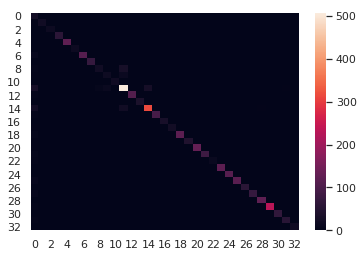

In [389]:
ax = sns.heatmap(conf_matrix)

Confusion matrix, without normalization
[[25  0  0 ...  0  0  0]
 [ 3 22  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 1  0  0 ... 66  0  0]
 [ 5  0  0 ...  0 55  0]
 [ 0  0  0 ...  0  0 21]]


NameError: ignored

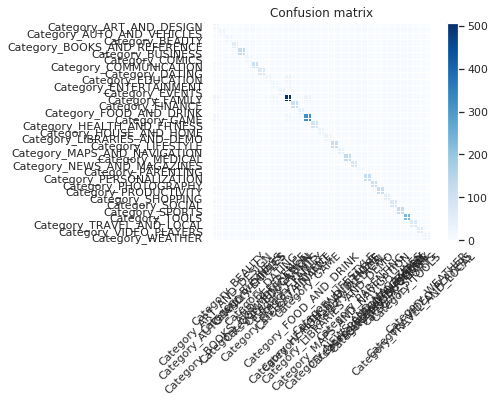

In [392]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plot_confusion_matrix(conf_matrix, classes=y_columns, title='Confusion matrix')

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
# plot_confusion_matrix(y_true=y_test.argmax(axis=1), y_pred = y_test_predict.argmax(axis=1), classes=y_columns, title='Confusion matrix')
# y_test.argmax(axis=1), y_test_predict.

# Подбор параметров

In [393]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.051265155508697924 1


In [394]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

1.5974185715883132e-05 0.003130940400313094


In [395]:
best_n_neighbors

1

# Вывод 
Самое лучшее значение средней ошибки на тестовом наборе было достигнуто при __n=1__

___kNN___ как ни странно показал довольно хороший результат, и может претендовать на baseline